# **Library Installation**

In [1]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Read Data**

In [2]:
# Load your dataset
df = pd.read_csv('XCryptocurrencyDataset.csv', delimiter=';')
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Dec 31 23:59:59 +0000 2023,"1,74161E+18",'Token: $GROK24 - Grok 2024 Network: Ethereum ...,0,0,0,0,en,2934357398,"1,74161E+18",CryptoMonkeyAi,https://twitter.com/CryptoMonkeyAi/status/1741...
1,Sun Dec 31 23:59:57 +0000 2023,"1,74161E+18",@metaversejoji Let's check @SolanaMono $SOL #W...,0,0,0,0,en,"1,5053E+18","1,73938E+18",lordnonold,https://twitter.com/lordnonold/status/17416101...
2,Sun Dec 31 23:59:54 +0000 2023,"1,74161E+18","Day's DCA: $BTC, $ATOM, $DVPN, $AXL, $JKL, $HU...",0,1,0,1,en,"8,27639E+17","1,74161E+18",richieblasco,https://twitter.com/richieblasco/status/174161...
3,Sun Dec 31 23:59:54 +0000 2023,"1,74161E+18",@BorkSOL @Cerita_Crypto @solana @aeyakovenko Y...,0,0,0,0,en,"1,58858E+18","1,74156E+18",FlokiArmy2021x,https://twitter.com/FlokiArmy2021x/status/1741...
4,Sun Dec 31 23:59:53 +0000 2023,"1,74161E+18",👉 WL FOR .0 SOL MINT 👈 👉40 HOURS TILL SNAPSHOT...,5,11,12,18,en,"1,47307E+18","1,74161E+18",Voxean,https://twitter.com/Voxean/status/174161015542...
...,...,...,...,...,...,...,...,...,...,...,...,...
9879,Wed Jan 31 14:49:29 +0000 2024,"1,75271E+18",CyberKong VX #11328 was adopted for 0.18 $ETH...,0,0,0,1,en,"1,37519E+18","1,75271E+18",CyberKongzBot,https://twitter.com/CyberKongzBot/status/17527...
9880,Wed Jan 31 14:49:29 +0000 2024,"1,75271E+18",BULLISH ON SOLANA BULLISH ON JUP BULLISH ON MA...,0,2,0,2,en,428107695,"1,75271E+18",Pinapaan,https://twitter.com/Pinapaan/status/1752705666...
9881,Wed Jan 31 14:49:28 +0000 2024,"1,75271E+18",@naija_bitcoin 🍿🍿🍿🍿🍿 rd to 3k before valentine...,0,1,0,1,en,457034603,"1,75268E+18",everythingsats,https://twitter.com/everythingsats/status/1752...
9882,Wed Jan 31 14:49:28 +0000 2024,"1,75271E+18",Binance Futures #KLAY/ #USDT Take-Profit targe...,0,1,0,0,en,"1,40602E+18","1,75271E+18",Criptoprime0,https://twitter.com/Criptoprime0/status/175270...


In [3]:
# Remove Duplicates
df = df.drop_duplicates()
df = df.reset_index(drop=True)
display(df)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Dec 31 23:59:59 +0000 2023,"1,74161E+18",'Token: $GROK24 - Grok 2024 Network: Ethereum ...,0,0,0,0,en,2934357398,"1,74161E+18",CryptoMonkeyAi,https://twitter.com/CryptoMonkeyAi/status/1741...
1,Sun Dec 31 23:59:57 +0000 2023,"1,74161E+18",@metaversejoji Let's check @SolanaMono $SOL #W...,0,0,0,0,en,"1,5053E+18","1,73938E+18",lordnonold,https://twitter.com/lordnonold/status/17416101...
2,Sun Dec 31 23:59:54 +0000 2023,"1,74161E+18","Day's DCA: $BTC, $ATOM, $DVPN, $AXL, $JKL, $HU...",0,1,0,1,en,"8,27639E+17","1,74161E+18",richieblasco,https://twitter.com/richieblasco/status/174161...
3,Sun Dec 31 23:59:54 +0000 2023,"1,74161E+18",@BorkSOL @Cerita_Crypto @solana @aeyakovenko Y...,0,0,0,0,en,"1,58858E+18","1,74156E+18",FlokiArmy2021x,https://twitter.com/FlokiArmy2021x/status/1741...
4,Sun Dec 31 23:59:53 +0000 2023,"1,74161E+18",👉 WL FOR .0 SOL MINT 👈 👉40 HOURS TILL SNAPSHOT...,5,11,12,18,en,"1,47307E+18","1,74161E+18",Voxean,https://twitter.com/Voxean/status/174161015542...
...,...,...,...,...,...,...,...,...,...,...,...,...
9879,Wed Jan 31 14:49:29 +0000 2024,"1,75271E+18",CyberKong VX #11328 was adopted for 0.18 $ETH...,0,0,0,1,en,"1,37519E+18","1,75271E+18",CyberKongzBot,https://twitter.com/CyberKongzBot/status/17527...
9880,Wed Jan 31 14:49:29 +0000 2024,"1,75271E+18",BULLISH ON SOLANA BULLISH ON JUP BULLISH ON MA...,0,2,0,2,en,428107695,"1,75271E+18",Pinapaan,https://twitter.com/Pinapaan/status/1752705666...
9881,Wed Jan 31 14:49:28 +0000 2024,"1,75271E+18",@naija_bitcoin 🍿🍿🍿🍿🍿 rd to 3k before valentine...,0,1,0,1,en,457034603,"1,75268E+18",everythingsats,https://twitter.com/everythingsats/status/1752...
9882,Wed Jan 31 14:49:28 +0000 2024,"1,75271E+18",Binance Futures #KLAY/ #USDT Take-Profit targe...,0,1,0,0,en,"1,40602E+18","1,75271E+18",Criptoprime0,https://twitter.com/Criptoprime0/status/175270...


# **Data Pre-processing**

In [4]:
# Data Preprocessing
def clean_tweet(text):
    # Remove URLs, mentions
    text = re.sub(r'http\S+|@\S+', '', text)

    # Remove hashtag
    text = re.sub(r'#\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize tweet into words
    word = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word = [word for word in word if word not in stop_words]

    # Lemmatization words
    lemmatizer = WordNetLemmatizer()
    word = [lemmatizer.lemmatize(word) for word in word]

    # Stem words
    # ps = PorterStemmer()
    # word = [ps.stem(word) for word in word]

    # Remove words with length < 3
    word = [word for word in word if len(word) > 2]

    # Join words back into a string
    processed_text = ' '.join(word)

    return processed_text

# Applying the cleaning function to the dataset
df['processed_text'] = df['full_text'].apply(clean_tweet)

# Remove or replace empty rows in 'processed_text'
df = df[df['processed_text'].str.strip().astype(bool)]

# Display the processed data
df[['full_text', 'processed_text']].head()

,full_text,processed_text
0,'Token: $GROK24 - Grok 2024 Network: Ethereum ...,token grok grok network ethereum contract xccc...
1,@metaversejoji Let's check @SolanaMono $SOL #W...,let check sol
2,"Day's DCA: $BTC, $ATOM, $DVPN, $AXL, $JKL, $HU...",day dca btc atom dvpn axl jkl huahua
3,@BorkSOL @Cerita_Crypto @solana @aeyakovenko Y...,project really amazing thats followed send please
4,👉 WL FOR .0 SOL MINT 👈 👉40 HOURS TILL SNAPSHOT...,sol mint hour till snapshot requirement join d...


# **Data Labeling**

In [5]:
# Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
  scores = analyzer.polarity_scores(text)
  if scores['compound'] >= 0.05:
    return "Positive"
  elif scores['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

df['vader_sentiment'] = df['processed_text'].apply(get_sentiment_vader)

In [6]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mapping vader_sentiment ke nilai numerik untuk analisis lebih lanjut
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
df['vader_sentiment_numeric'] = df['vader_sentiment'].map(sentiment_mapping)

# Menggabungkan skor sentimen dengan fitur TF-IDF
combined_features = pd.concat([tfidf_df, df[['vader_sentiment_numeric']]], axis=1)

In [7]:
# Generate XLSX file for clean data
labeled_data = df[['full_text', 'processed_text', 'vader_sentiment']]
display(labeled_data)
labeled_data.to_excel('XCleanCryptocurrencyDataset.xlsx')

,full_text,processed_text,vader_sentiment
0,'Token: $GROK24 - Grok 2024 Network: Ethereum ...,token grok grok network ethereum contract xccc...,Positive
1,@metaversejoji Let's check @SolanaMono $SOL #W...,let check sol,Neutral
2,"Day's DCA: $BTC, $ATOM, $DVPN, $AXL, $JKL, $HU...",day dca btc atom dvpn axl jkl huahua,Neutral
3,@BorkSOL @Cerita_Crypto @solana @aeyakovenko Y...,project really amazing thats followed send please,Positive
4,👉 WL FOR .0 SOL MINT 👈 👉40 HOURS TILL SNAPSHOT...,sol mint hour till snapshot requirement join d...,Positive
...,...,...,...
9879,CyberKong VX #11328 was adopted for 0.18 $ETH...,cyberkong adopted eth blur,Neutral
9880,BULLISH ON SOLANA BULLISH ON JUP BULLISH ON MA...,bullish solana bullish jup bullish madlads,Neutral
9881,@naija_bitcoin 🍿🍿🍿🍿🍿 rd to 3k before valentine...,valentine,Neutral
9882,Binance Futures #KLAY/ #USDT Take-Profit targe...,binance future takeprofit target profit period...,Positive


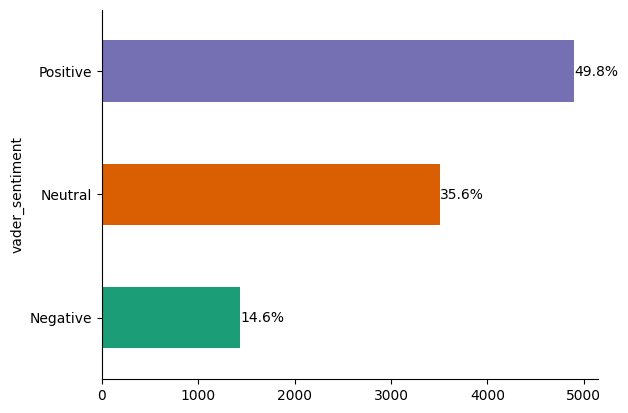

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah total entri untuk normalisasi
total = df['vader_sentiment'].count()

# Membuat plot batang horizontal untuk distribusi sentimen
ax = df.groupby('vader_sentiment').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Menghilangkan spines atas dan kanan
ax.spines[['top', 'right']].set_visible(False)

# Menambahkan label persentase pada batang
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02  # Menyesuaikan posisi teks sedikit ke kanan dari batang
    y = p.get_y() + height / 2    # Posisi teks di tengah-tengah batang secara vertikal
    ax.text(x, y, percentage, va='center')

plt.show()